Enter the number of seconds for which you want the output of square wave to be shown
4
Enter the period of square wave
2

Enter the list of coefficient values you want on the plot. when finished enter '0'
1
Enter the list of coefficient values you want on the plot. when finished enter '0'
5
Enter the list of coefficient values you want on the plot. when finished enter '0'
10
Enter the list of coefficient values you want on the plot. when finished enter '0'
20
Enter the list of coefficient values you want on the plot. when finished enter '0'
50
Enter the list of coefficient values you want on the plot. when finished enter '0'
100
Enter the list of coefficient values you want on the plot. when finished enter '0'
0


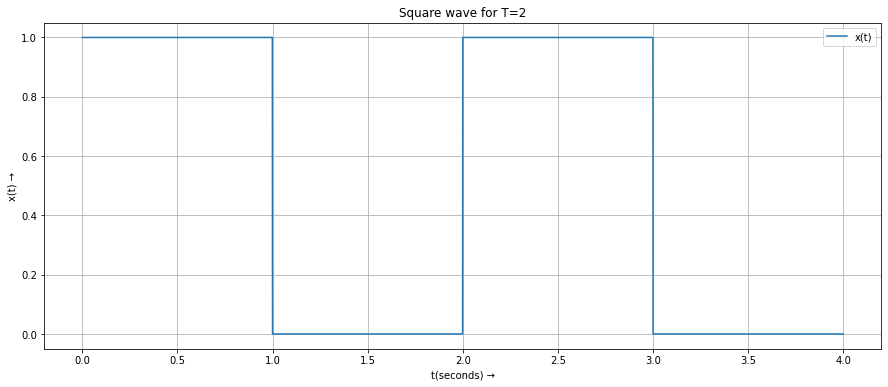

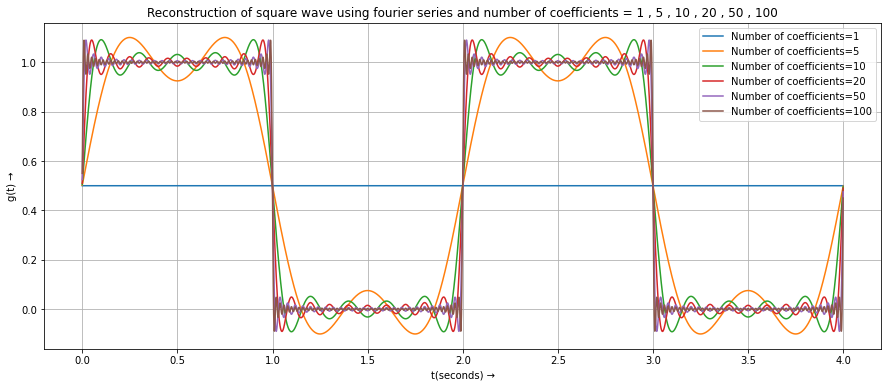

In [1]:
#--------------------------------------------SQUARE WAVE FOURIER SERIES-------------------------#
import numpy as np
import matplotlib.pyplot as plt
import cmath
from random import randint as rint
num=1000
seconds=int(input("Enter the number of seconds for which you want the output of square wave to be shown\n"))
Period=int(input("Enter the period of square wave\n"))
def plotfig(x,y,x_label,y_label,title,fig,labl):
    plt.figure(fig,figsize=(15,6))
    global num
    plt.plot(x,y,label=labl)
    plt.xlabel(x_label)
    plt.grid('true')
    plt.ylabel(y_label)
    plt.legend()
    plt.title(title)
def Fourier_Series(x,N,P,tot):
    u=1/(tot*P)
    a=np.empty([N])
    b=np.empty([N])
    normalize=len(x)/seconds
    for i in range(N):
        a[i]=0
        b[i]=0
        for j in range(len(x)):
            a[i]+=x[j]*np.cos(2*np.pi*j*i/(normalize*P))
            b[i]+=x[j]*np.sin(2*np.pi*j*i/(normalize*P))
        if i==0:
            a[i]*=u
        else:
            a[i]*=2*u
        b[i]*=2*u
    return a,b
def Inverse_Fourier_Series(a,b,T):
    y=np.empty([num*seconds])
    normalize=len(y)/seconds
    for t in range(len(y)):
        y[t]=0
        for m in range(len(a)):
            y[t]+=a[m]*np.cos(2*np.pi*m*t/(normalize*T))+b[m]*np.sin(2*np.pi*m*t/(normalize*T))
    return(y)
t=np.arange(0,seconds,1/num)
x=np.empty([num*seconds])
fig=1
tot=0
for i in range(num*seconds):
    if int(i/num)%Period<1:
        x[i]=1
    else:
        x[i]=0
    tot+=x[i]
xlabel="t(seconds) →"
ylabel="x(t) →"
title="Square wave for T=2"
labl="x(t)"
plotfig(t,x,xlabel,ylabel,title,fig,labl)
fig+=1
ylabel="g(t) →"
coef=[]
print()
for i in range(100):
    v=int(input("Enter the list of coefficient values you want on the plot. when finished enter '0'\n"))
    if v==0:
        break
    else:
        coef.append(v)
coe=[]
for i in coef:
    coe.append(str(i))
s=' , '
coeff=s.join(coe)
a=[]
b=[]
title="Reconstruction of square wave using fourier series and number of coefficients = "+coeff
for i in coef:
    a,b=Fourier_Series(x,i,Period,tot)
    labl="Number of coefficients="+str(i)
    y=Inverse_Fourier_Series(a,b,Period)
    plotfig(t,y,xlabel,ylabel,title,fig,labl)

E:\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


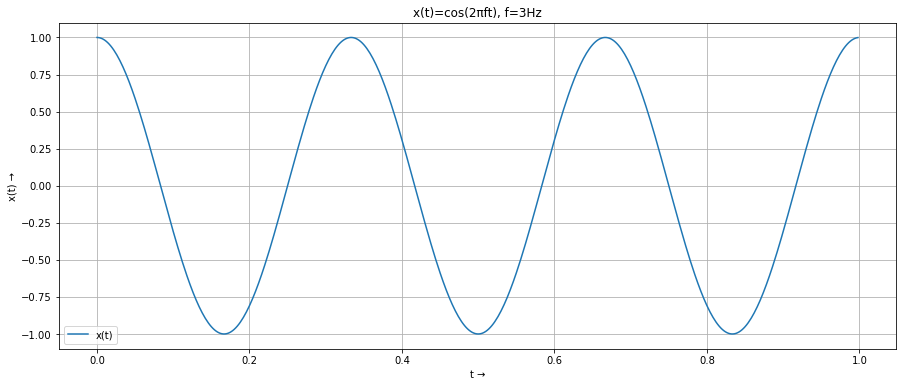

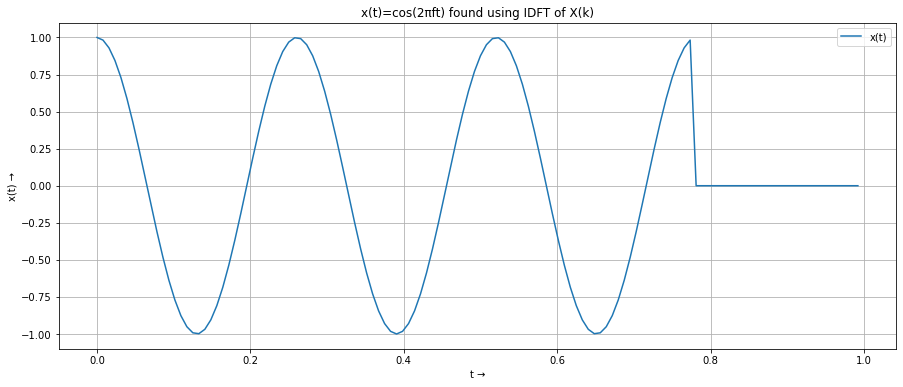

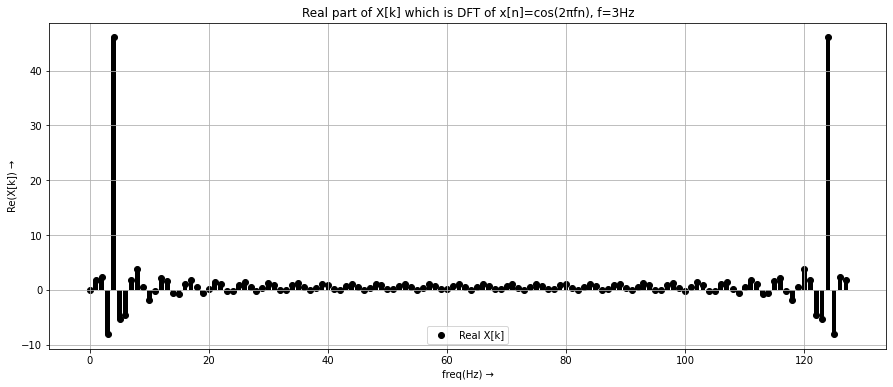

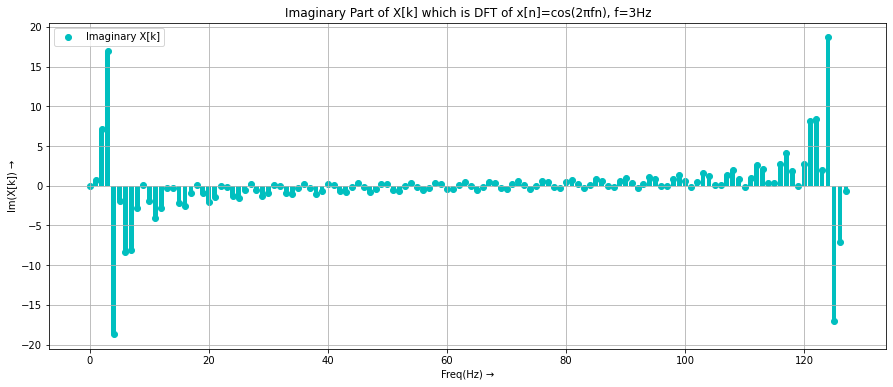

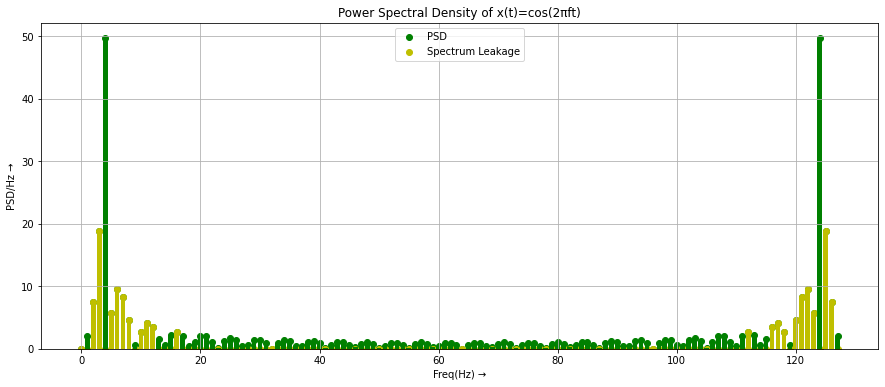

In [2]:
#-------------------------DFT OF x(t)=cos(2πft) where f=3 Hz, its DFT, PSD and Spectral Leakage------------#
def plot_dis(n,x,xlabel,ylabel,title,fig,labl):
    col=['r','g','b','c','m','k','y']
    u=rint(0,len(col)-1)
    #n=np.arange(0,len(x),1)
    plt.figure(fig,figsize=(15,6))
    plt.scatter(n,x,label=labl,color=col[u])
    plt.bar(n,x,color=col[u])
    plt.grid('true')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.legend()
def DFT(s,M):
    S=[]
    for k in range(M):
        p=0
        for n in range(len(s)):
            y=-2*np.pi*k*n/M
            exp=complex(np.cos(y),np.sin(y))
            p+=s[n]*exp
        S.append(p)
    return S
def IDFT(S,M):
    R=[]
    for n in range(M):
        p=0
        for k in range(M):
            y=2j*np.pi*k*n/M
            exp=np.exp(y)
            p+=S[k]*exp
        if p.imag<10**-4:
            p+=np.conj(p)
            p=p/2
        R.append(p/M)
    return R
x=np.empty([500])
xd=np.empty([100])
f=3
t=np.arange(0,1,1/len(x))
td=np.arange(0,1,1/len(xd))
x=np.cos(2*np.pi*f*t)
xd=np.cos(2*np.pi*f*td)
M=2**(int(np.log(len(xd))/np.log(2))+1)
y=DFT(xd,M)
x2=IDFT(y,M)
k=np.arange(0,1,1/len(y))
fig+=1
yre=np.empty([len(y)])
yim=np.empty([len(y)])
for i in range(len(y)):
    if y[i].real < 10**-2 and y[i].real > -10**-2:
        yre[i]=0
    else:
        yre[i]=y[i].real
    if y[i].imag < 10**-2 and y[i].imag > -10**-2:
        yim[i]=0
    else:
        yim[i]=y[i].imag
plotfig(t,x,"t →","x(t) →","x(t)=cos(2πft), f=3Hz",fig,"x(t)")
fig+=1
plotfig(k,x2,"t →","x(t) →","x(t)=cos(2πft) found using IDFT of X(k)",fig,"x(t)")
n=np.arange(0,len(yre),1)
fig+=1
plot_dis(n,yre,"freq(Hz) →","Re(X[k]) →","Real part of X[k] which is DFT of x[n]=cos(2πfn), f=3Hz",fig,"Real X[k]")
fig+=1
plot_dis(n,yim,"Freq(Hz) →","Im(X[k]) →","Imaginary Part of X[k] which is DFT of x[n]=cos(2πfn), f=3Hz",fig,"Imaginary X[k]")
power=np.empty([len(y)])
for i in range(len(y)):
    power[i]=abs(y[i])
fig+=1
plot_dis(n,power,"Freq(Hz) →","PSD/Hz →","Power Spectral Density of x(t)=cos(2πft)",fig,"PSD")
spectr_leak=np.empty([len(power)])
powermean=np.mean(power)
powermax=np.amax(power)
for i in range(len(power)):
    if power[i]<0.9*powermax and power[i]>powermean:
        spectr_leak[i]=power[i]
    else:
        spectr_leak[i]=0
plot_dis(n,spectr_leak,"Freq(Hz) →","PSD/Hz →","Power Spectral Density of x(t)=cos(2πft)",fig,"Spectrum Leakage")


Text(0.5, 1.0, 'PSD using Bartlett function x(t)=cos(2πft)*w(t)')

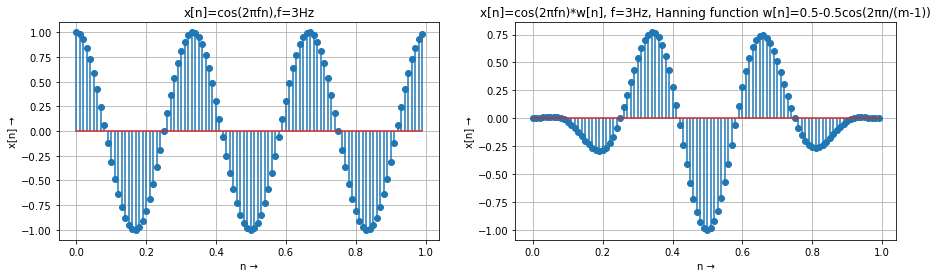

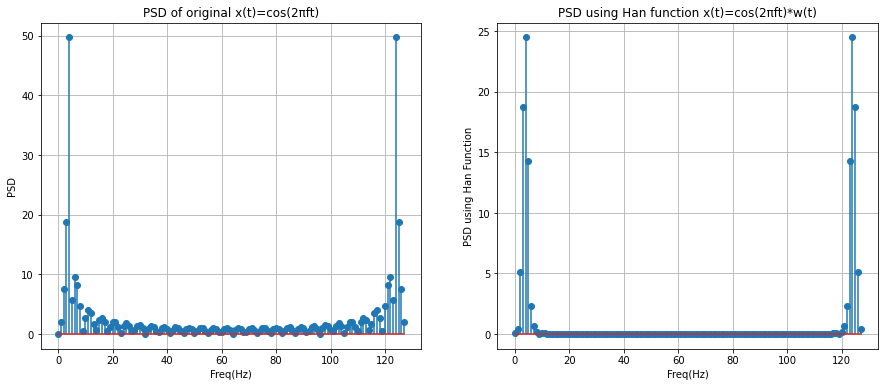

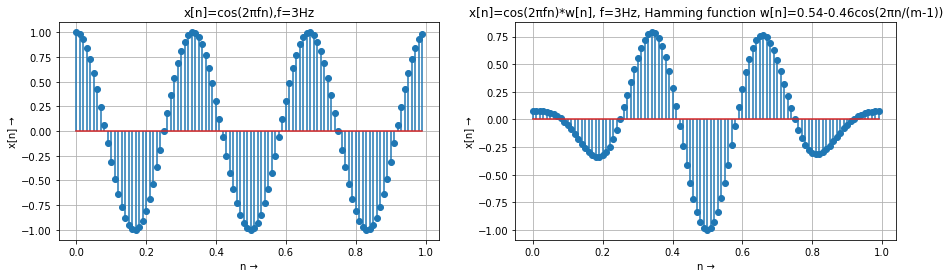

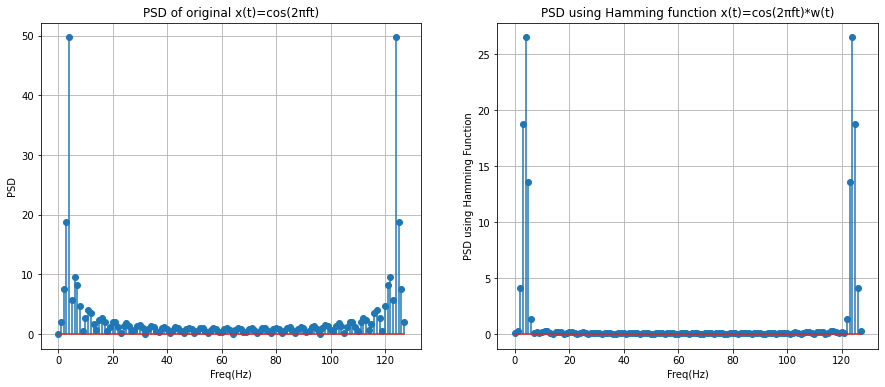

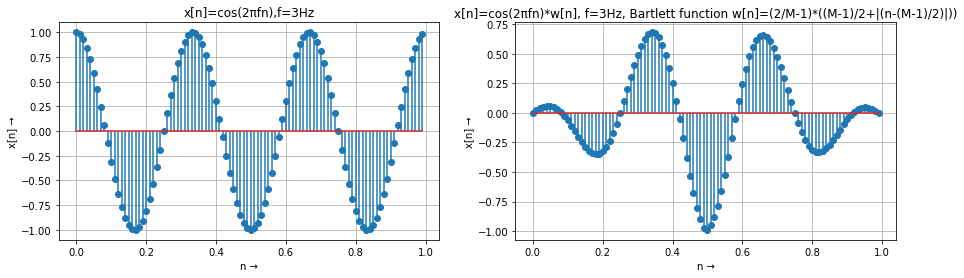

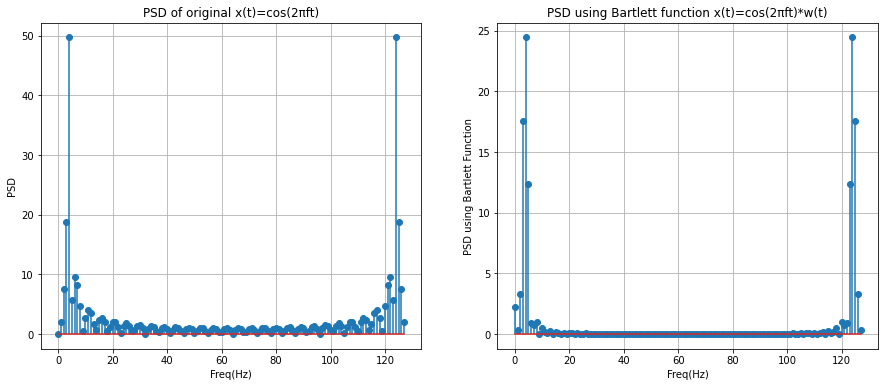

In [3]:
#---------------------------------------------WINDOWING--------------------------------#
han=np.hanning(len(xd))
fig+=1
x_han=xd*han
k1=np.arange(0,1,1/len(xd))
k2=np.arange(0,1,1/len(x_han))
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.stem(k1,xd)
plt.xlabel('n →')
plt.ylabel('x[n] →')
plt.title('x[n]=cos(2πfn),f=3Hz')
plt.grid('true')
plt.subplot(1,2,2)
plt.stem(k2,x_han)
plt.xlabel('n →')
plt.ylabel('x[n] →')
plt.title('x[n]=cos(2πfn)*w[n], f=3Hz, Hanning function w[n]=0.5-0.5cos(2πn/(m-1))')
plt.grid('true')
M2=2**(int(np.log(len(x_han))/np.log(2))+1)
y_han=DFT(x_han,M2)
power_han=np.empty([len(y_han)])
for i in range(len(power_han)):
    power_han[i]=abs(y_han[i])
fig+=1
plt.figure(fig,figsize=(15,6))
plt.subplot(1,2,1)
plt.stem(n,power)
plt.xlabel("Freq(Hz)")
plt.ylabel("PSD")
plt.title("PSD of original x(t)=cos(2πft)")
plt.grid('true')
plt.subplot(1,2,2)
plt.stem(n,power_han)
plt.xlabel("Freq(Hz)")
plt.grid('true')
plt.ylabel("PSD using Han Function")
plt.title("PSD using Han function x(t)=cos(2πft)*w(t)")
#--------------------------------------------------------HAMMING------------------------------------------#
ham=np.hamming(len(xd))
fig+=1
x_ham=xd*ham
k1=np.arange(0,1,1/len(xd))
k2=np.arange(0,1,1/len(x_ham))
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.stem(k1,xd)
plt.xlabel('n →')
plt.ylabel('x[n] →')
plt.title('x[n]=cos(2πfn),f=3Hz')
plt.grid('true')
plt.subplot(1,2,2)
plt.stem(k2,x_ham)
plt.xlabel('n →')
plt.ylabel('x[n] →')
plt.title('x[n]=cos(2πfn)*w[n], f=3Hz, Hamming function w[n]=0.54-0.46cos(2πn/(m-1))')
plt.grid('true')
M3=2**(int(np.log(len(x_ham))/np.log(2))+1)
y_ham=DFT(x_ham,M3)
power_ham=np.empty([len(y_ham)])
for i in range(len(power_ham)):
    power_ham[i]=abs(y_ham[i])
fig+=1
plt.figure(fig,figsize=(15,6))
plt.subplot(1,2,1)
plt.stem(n,power)
plt.xlabel("Freq(Hz)")
plt.ylabel("PSD")
plt.title("PSD of original x(t)=cos(2πft)")
plt.grid('true')
plt.subplot(1,2,2)
plt.stem(n,power_ham)
plt.xlabel("Freq(Hz)")
plt.grid('true')
plt.ylabel("PSD using Hamming Function")
plt.title("PSD using Hamming function x(t)=cos(2πft)*w(t)")
#---------------------------------------------BARTLETT------------------------------------------#
bart=np.bartlett(len(xd))
fig+=1
x_bart=xd*bart
k1=np.arange(0,1,1/len(xd))
k2=np.arange(0,1,1/len(x_bart))
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.stem(k1,xd)
plt.xlabel('n →')
plt.ylabel('x[n] →')
plt.title('x[n]=cos(2πfn),f=3Hz')
plt.grid('true')
plt.subplot(1,2,2)
plt.stem(k2,x_bart)
plt.xlabel('n →')
plt.ylabel('x[n] →')
plt.title('x[n]=cos(2πfn)*w[n], f=3Hz, Bartlett function w[n]=(2/M-1)*((M-1)/2+|(n-(M-1)/2)|))')
plt.grid('true')
M4=2**(int(np.log(len(x_bart))/np.log(2))+1)
y_bart=DFT(x_bart,M3)
power_bart=np.empty([len(y_bart)])
for i in range(len(power_bart)):
    power_bart[i]=abs(y_bart[i])
fig+=1
plt.figure(fig,figsize=(15,6))
plt.subplot(1,2,1)
plt.stem(n,power)
plt.xlabel("Freq(Hz)")
plt.ylabel("PSD")
plt.title("PSD of original x(t)=cos(2πft)")
plt.grid('true')
plt.subplot(1,2,2)
plt.stem(n,power_bart)
plt.xlabel("Freq(Hz)")
plt.grid('true')
plt.ylabel("PSD using Bartlett Function")
plt.title("PSD using Bartlett function x(t)=cos(2πft)*w(t)")

Text(0, 0.5, 'x(t)')

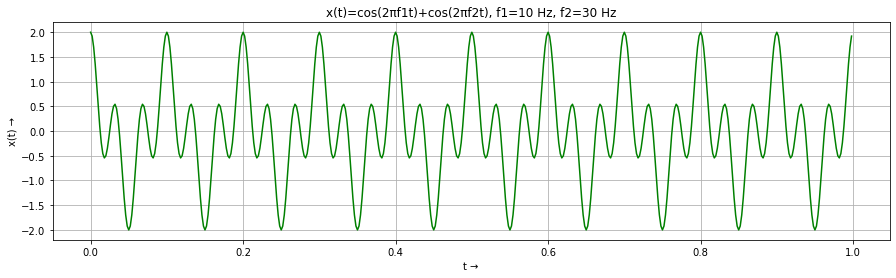

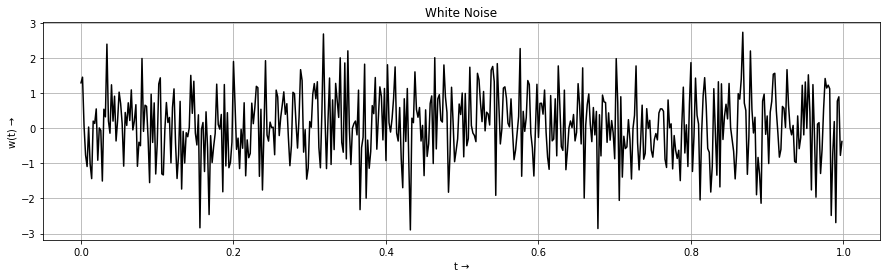

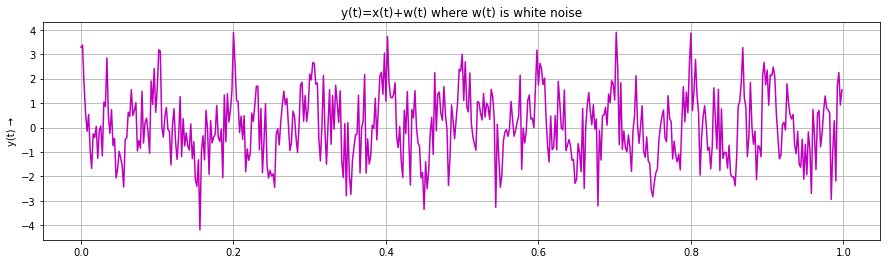

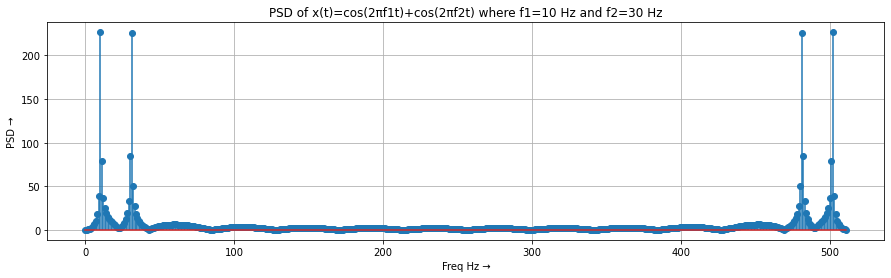

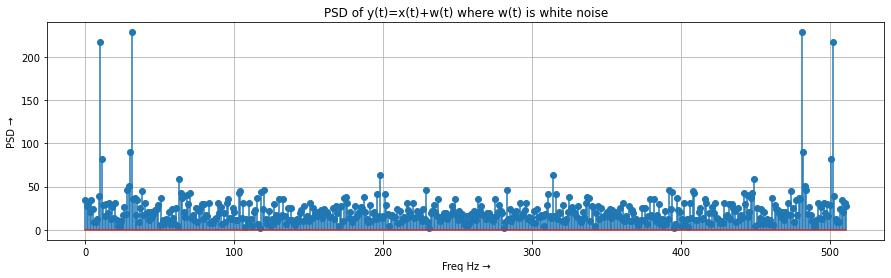

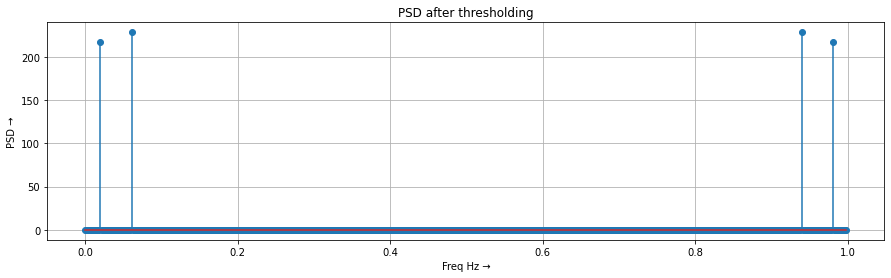

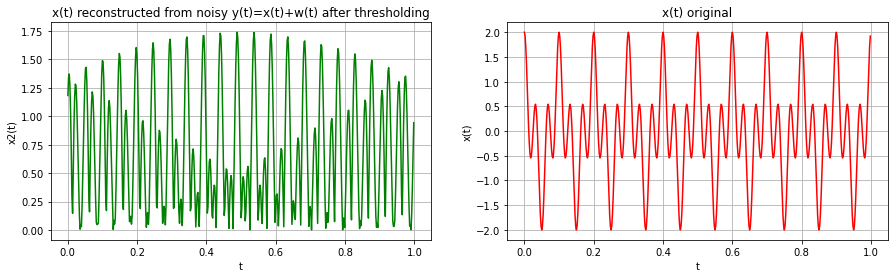

In [38]:
from random import gauss as gau
from random import seed as se
t=np.arange(0,1,1/500)
x=np.empty([100])
f2=30
f1=10
x=np.cos(2*np.pi*f1*t)+np.cos(2*np.pi*f2*t)
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(t,x,color='g')
plt.xlabel('t →')
plt.title('x(t)=cos(2πf1t)+cos(2πf2t), f1=10 Hz, f2=30 Hz')
plt.ylabel('x(t) →')
plt.grid('true')
se(1)
w = [gau(0.0, 1.0) for i in t]
#t2=np.arange(0,1000,1)
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(t,w,color='k')
plt.xlabel('t →')
plt.title('White Noise')
plt.ylabel('w(t) →')
plt.grid('true')
y=x+w
fig+=1
plt.figure(fig,figsize=(15,4))
plt.plot(t,y,color='m')
plt.title('y(t)=x(t)+w(t) where w(t) is white noise')
plt.ylabel('y(t) →')
plt.grid('True')
m5=2**(int(np.log(len(y))/np.log(2))+1)
m4=2**(int(np.log(len(x))/np.log(2))+1)
X=DFT(x,m4)
Y=DFT(y,m5)
power_x=np.empty([len(X)])
power_y=np.empty([len(Y)])
for i in range(len(X)):
    power_x[i]=abs(X[i])
for i in range(len(Y)):
    power_y[i]=abs(Y[i])
fig+=1
t2=np.arange(0,len(X),1)
t3=np.arange(0,1,1/len(Y))
plt.figure(fig,figsize=(15,4))
plt.stem(t2,power_x)
plt.xlabel('Freq Hz →')
plt.grid('true')
plt.title('PSD of x(t)=cos(2πf1t)+cos(2πf2t) where f1=10 Hz and f2=30 Hz')
plt.ylabel('PSD →')
fig+=1
plt.figure(fig,figsize=(15,4))
plt.stem(t2,power_y)
plt.grid('true')
plt.title('PSD of y(t)=x(t)+w(t) where w(t) is white noise')
plt.xlabel('Freq Hz →')
plt.ylabel('PSD →')
thresh=100
Y2=[]
for i in range(len(Y)):
    if np.abs(Y[i])<thresh:
        Y2.append(Y[i]-Y[i])
    else:
        tr=Y[i].real
        ti=Y[i].imag
        Y2.append(complex(float(tr),float(ti)))
power_y2=np.empty(len(Y2))
for i in range(len(Y2)):
     power_y2[i]=abs(Y2[i])
fig+=1
plt.figure(fig,figsize=(15,4))
plt.stem(t3,power_y2)
plt.title('PSD after thresholding')
plt.grid('true')
plt.xlabel('Freq Hz →')
plt.ylabel('PSD →')
y2=IDFT(Y2,len(Y2))
x2=np.empty([len(y2)])
for i in range(len(y2)):
    x2[i]=np.abs(y2[i])
fig+=1
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(t3,x2,color='g')
plt.grid('true')
plt.title('x(t) reconstructed from noisy y(t)=x(t)+w(t) after thresholding')
plt.xlabel('t')
plt.ylabel('x2(t)')
plt.subplot(1,2,2)
plt.plot(t,x,color='r')
plt.grid('true')
plt.title('x(t) original')
plt.xlabel('t')
plt.ylabel('x(t)')